In [2]:
from numpy import  *
import matplotlib.pyplot as plt

In [3]:
def loadDataset(filename):
    dataset=[]
    label=[]
    numFeat=len(open(filename).readline().strip().split(','))-1
    fr=open(filename)
    for line in fr.readlines():
        arr=line.strip().split(',')
        vec=[1]
        for k in range(numFeat):
            vec.append(float(arr[k]))
        dataset.append(vec)
        label.append(int(arr[-1]))
    return dataset,label

In [4]:
dataset,label=loadDataset('ex2data1.txt')

In [5]:
#plot
xcode1=[];ycode1=[]
xcode2=[];ycode2=[]
for i in range(len(dataset)):
    if label[i]==1:
        xcode1.append(dataset[i][1])
        ycode1.append(dataset[i][2])
    else:
        xcode2.append(dataset[i][1])
        ycode2.append(dataset[i][2])  

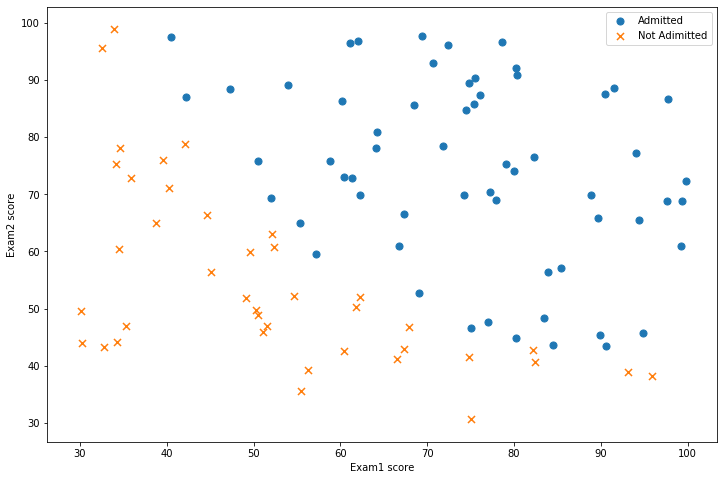

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(xcode1,ycode1,s=50)
plt.scatter(xcode2,ycode2,s=50,marker='x')
plt.legend(('Admitted','Not Adimitted'))
plt.xlabel('Exam1 score')
plt.ylabel('Exam2 score')
plt.show()

In [7]:
def sigmoid(z):
    return 1.0/(1+exp(-z))
sigmoid(0)

0.5

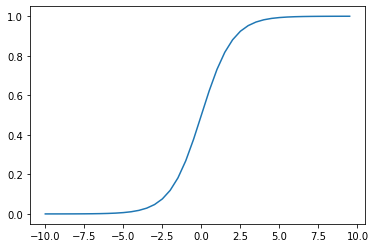

In [8]:
nums=arange(-10,10,0.5)
plt.plot(nums,sigmoid(nums))

In [9]:
def cost(theta,X,y):
    X=mat(X)
    y=mat(y)
    theta=mat(theta)
    first=multiply(-y,log(sigmoid(X*theta.T)))
    second=multiply((1-y),log(1-sigmoid(X*theta.T)))
    return sum(first-second)/len(X)

In [10]:
X=mat(dataset)
y=mat(label).T
theta=zeros(3)
X.shape,y.shape,theta.shape

((100, 3), (100, 1), (3,))

In [11]:
cost(theta,X,y)

0.6931471805599453

In [62]:
def gradient(theta,X,y):
    theta=mat(theta)
    parameters=theta.shape[1]
    grad=zeros(parameters)
  
    error=sigmoid(X*theta.T)-y
    for i in range(parameters):
        temp=multiply(error,X[:,i])
        grad[i]=sum(temp)/len(X)
    return grad
gradient(theta,X,y)

array([ -0.1       , -12.00921659, -11.26284221])

In [13]:
import scipy.optimize as opt

In [14]:
result=opt.fmin_tnc(func=cost,x0=theta,fprime=gradient,args=(X,y))
result

(array([-25.16131876,   0.20623159,   0.20147149]), 36, 0)

In [15]:
cost(result[0],X,y)

0.20349770158947397

In [16]:
def predict(theta,X):
    pro=sigmoid(X*theta.T)
    return [1 if x>=0.5 else 0 for x in pro]


In [17]:
predictions=predict(mat(result[0]),X)
correct=[1 if(a==b) else 0 for (a,b) in zip(predictions,y)]
accuracy=sum(correct)/(len(correct))
print('accuracy = {}%'.format(accuracy*100))

accuracy = 89.0%


In [25]:
# batch gradient decent
def gradientDecent(theta,X,y,alpha,iters):
    costs=zeros(iters)
    for i in range(iters):
        grad=gradient(theta,X,y)
        theta=theta-alpha*grad
        costs[i]=cost(theta,X,y)
        
    return costs

In [89]:
c=gradientDecent(theta,X,y,0.001,50000)

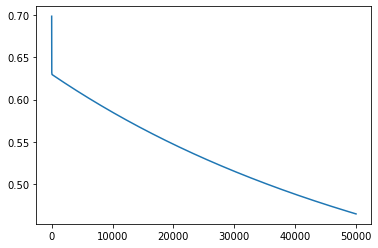

In [90]:
plt.plot(arange(50000),c)
plt.show()